# Assignment 1
Emilia Zielinska <br>
300018129 <br>
CSI 5341 <br>
Dr. Jochen Lang <br>
September 28, 2023

## Getting Started

In [1]:
from pathlib import Path

In [2]:
# Generate lists of filenames for the needed images

directory_4 = Path("./English/Img/GoodImg/Bmp/Sample005")
directory_A = Path("./English/Img/GoodImg/Bmp/Sample011")
directory_u = Path("./English/Img/GoodImg/Bmp/Sample057")
directory_H = Path("./English/Img/GoodImg/Bmp/Sample018")

file_list_4 = [f for f in directory_4.glob('**/*') if f.is_file()]
file_list_A = [f for f in directory_A.glob('**/*') if f.is_file()]
file_list_u = [f for f in directory_u.glob('**/*') if f.is_file()]
file_list_H = [f for f in directory_H.glob('**/*') if f.is_file()]

In [3]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [4]:
# Preprocess each image by turning it grayscale and resizing to 50 by 50
# Reshape the data of each image to be in a 1D array
# Then save image into numpy matrix // 2D array

matrix_4 = []
for f in file_list_4:
    img = imread(f, True)
    img_resized = resize(img, (50, 50))
    data = np.array(img_resized)
    data_reshaped = np.reshape(data, 50*50)
    matrix_4.append(data_reshaped)

matrix_A = []
for f in file_list_A:
    img = imread(f, True)
    img_resized = resize(img, (50, 50))
    data = np.array(img_resized)
    data_reshaped = np.reshape(data, 50*50)
    matrix_A.append(data_reshaped)

matrix_u = []
for f in file_list_u:
    img = imread(f, True)
    img_resized = resize(img, (50, 50))
    data = np.array(img_resized)
    data_reshaped = np.reshape(data, 50*50)
    matrix_u.append(data_reshaped)

matrix_H = []
for f in file_list_H:
    img = imread(f, True)
    img_resized = resize(img, (50, 50))
    data = np.array(img_resized)
    data_reshaped = np.reshape(data, 50*50)
    matrix_H.append(data_reshaped)

## Binary Classifiers

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
# Create the target sets for '4' and 'A'
target_4 = ['4'] * len(matrix_4)
target_A = ['A'] * len(matrix_A)

# Concatenate the data and the target sets for '4' and 'A' into one big data / target set
x = np.concatenate((matrix_4, matrix_A), axis=0)
y = np.concatenate((target_4, target_A))

# Split the data and target sets into training, testing, and validation sets
# 70% will be training, 15% will be testing, and 15% will be validation
x_train, x_combine, y_train, y_combine = train_test_split(x, y, train_size=0.7, random_state=3)
x_test, x_val, y_test, y_val = train_test_split(x_combine, y_combine, test_size=0.5, random_state=3)

# Create and train the classifier
clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

/Users/emiliazielinska/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As can be seen above, we are splitting the dataset into the following:
- 70% training set,
- 15% testing set,
- 15% validation set.

Given that there are 605 images for '4' and 'A' combined, that gives us:
- 423 images in the training set,
- 91 images in the testing set,
- 91 images in the validation set.

The `train_test_split` function splits the set for me, however I have chosen to set the `random_state` to `3`. If the `random_state` is left at the default of `None`, it will generate a random integer each time, altering the results each time the code is run. So while the images for each set are being chosen randomly, they are consistently chosen across code executions.

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

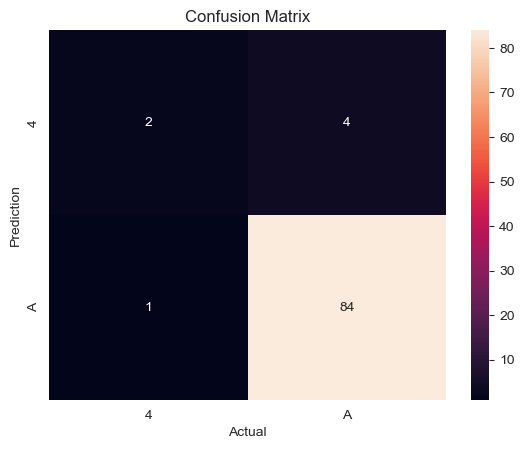

In [8]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=['4', 'A'], yticklabels=['4', 'A'])
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [9]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

# Precision = TP / (TP + FP)
precision_4 = tp / (tp + fp)
precision_A = tn / (tn + fn)

print('Precision for 4: ' + str(precision_4))
print('Precision for A: ' + str(precision_A))

# Recall = TP / (TP + FN)
recall_4 = tp / (tp + fn)
recall_A = tn / (tn + fp)

print('Recall for 4: ' + str(recall_4))
print('Recall for A: ' + str(recall_A))

Precision for 4: 0.3333333333333333
Precision for A: 0.9882352941176471
Recall for 4: 0.6666666666666666
Recall for A: 0.9545454545454546


In [10]:
from sklearn.metrics import RocCurveDisplay

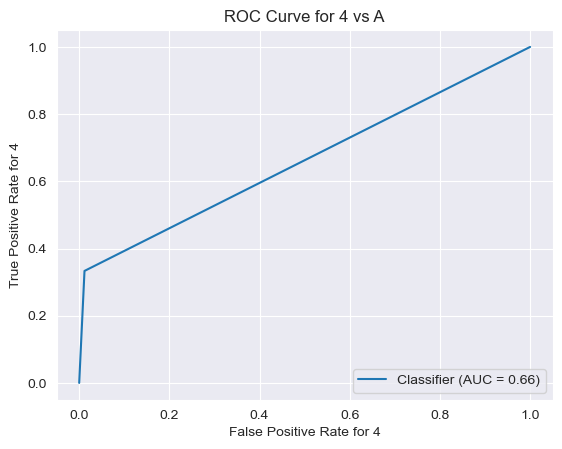

In [11]:
# Create new arrays for test and pred where 4 = 1 and A = 0
# This is necessary so that the ROC curve can be plotted properly

roc_true = []
for i in y_test:
    if i == '4':
        roc_true.append(1)
    else:
        roc_true.append(0)
        
roc_pred = []
for i in y_pred:
    if i == '4':
        roc_pred.append(1)
    else:
        roc_pred.append(0)
      
# Plot the ROC curve  
RocCurveDisplay.from_predictions(roc_true, roc_pred)
plt.title('ROC Curve for 4 vs A')
plt.xlabel('False Positive Rate for 4')
plt.ylabel('True Positive Rate for 4')
plt.show()

The precision and the recall for `A` are both very high. However, the precision and the recall for `4` are both pretty low: this is most likely due to the fact that out of the 91 images in the testing set, only 6 (less than 7%) are images of `4`. With such a low number, it means that the confusion matrix may not be as accurate as it could be if there was a testing set with a more even spread.

The ROC curve has an area under the curve (AUC) of 0.66. The closer the AUC is to 1, the better the model. If the AUC is at or below 0.5, then it's no better than a model that makes random classifications. This linear regression classifier is decent, but could still use some work.